<a href="https://colab.research.google.com/github/shivanshgautam111997-prog/Assignments-/blob/main/Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Problem 1: Prediction task is to determine whether a person makes over 50K a year.

## The description of the dataset is as follows:
Data Set Information: Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ####((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information: Listing of attributes:

- 50K, <=50K.

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,Without-pay, Never-worked.

- fnlwgt: continuous and represents final weight, which is the number of units in the target population that the responding unit represents.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. education-num: continuous and stands for the number of years of education in total.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof- specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



Import All the Required Labariery

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
%matplotlib inline

# Load Data

In [7]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',na_values="?")

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1,na_values="?")

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [8]:
train_set.shape,test_set.shape

((32560, 15), (16280, 15))

In [9]:
train_set.sample(4, random_state = 42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
14160,38,Private,680390,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,20,United-States,<=50K
27047,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28867,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,51,Private,306108,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,>50K


In [11]:
test_set.sample(4, random_state = 42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
13633,39,Private,82726,Some-college,10,Married-civ-spouse,Sales,Wife,White,Female,0,0,40,United-States,<=50K.
1921,20,Private,223811,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,23,United-States,<=50K.
12140,35,Private,111635,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K.
9933,25,Private,121789,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,38,United-States,<=50K.


# Check nun value

In [12]:
train_set.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [14]:
test_set.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


## Check the Data Type

In [17]:
pd.DataFrame([train_set.dtypes, test_set.dtypes], index = ['train_set','test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


## check how many columns are there type is object

In [18]:
for i in train_set.columns:
    if train_set[i].dtypes == 'object':
        print(i)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [19]:
train_set.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1297
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [20]:
train_set.native_country.value_counts()

,count
native_country,
United-States,29169
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [21]:
train_set.relationship.value_counts()

,count
relationship,
Husband,13193
Not-in-family,8304
Own-child,5068
Unmarried,3446
Wife,1568
Other-relative,981


Unique Counts

In [22]:
train_set.workclass.nunique(),train_set.education.nunique(),train_set.marital_status.nunique(),train_set.native_country.nunique()

(9, 16, 7, 42)

Concatenate both data set into a common dataframe

In [23]:
X_train = train_set.copy()
X_test = test_set.copy()

In [24]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [25]:
Sample = X_train
Sample.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [26]:
Sample.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
Sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  wage_class      32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
Sample.describe(include=['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


# DATA VISUALIZATION

In [34]:
def plot_distribution(dataset, cols=5, width=20, height=30, hspace=0.2, wspace=0.5):
    plt.style.use('fivethirtyeight') #Use matplotlib style settings from a style specification.
    fig = plt.figure(figsize=(width,height)) #Create a new figure
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace) # customizing the subplots
    rows = math.ceil(float(dataset.shape[1]) / cols)
    #print(rows)
    # iterating over the columns and then showing the data distribution in various columns
    for i, column in enumerate(dataset.columns):
        # print('befor',i,cols)
        ax = fig.add_subplot(rows, cols, i + 1)
        # print('after',i,cols)
        # print(column)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object_: # plot counts of different values if the column has a datatype object
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            #print(substrings)
            g.set(yticklabels=substrings) #Set the y-tick labels with list of strings labels.
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()
        else:
            g = sns.distplot(dataset[column]) # Plotting if the datatype of the column is not object
            plt.xticks(rotation=25) #Get or set the current tick locations and labels of the x-axis.
            #plt.show()

/tmp/ipython-input-1721956901.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(dataset[column]) # Plotting if the datatype of the column is not object
/tmp/ipython-input-1721956901.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set(yticklabels=substrings) #Set the y-tick labels with list of strings labels.
/tmp/ipython-input-1721956901.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot`

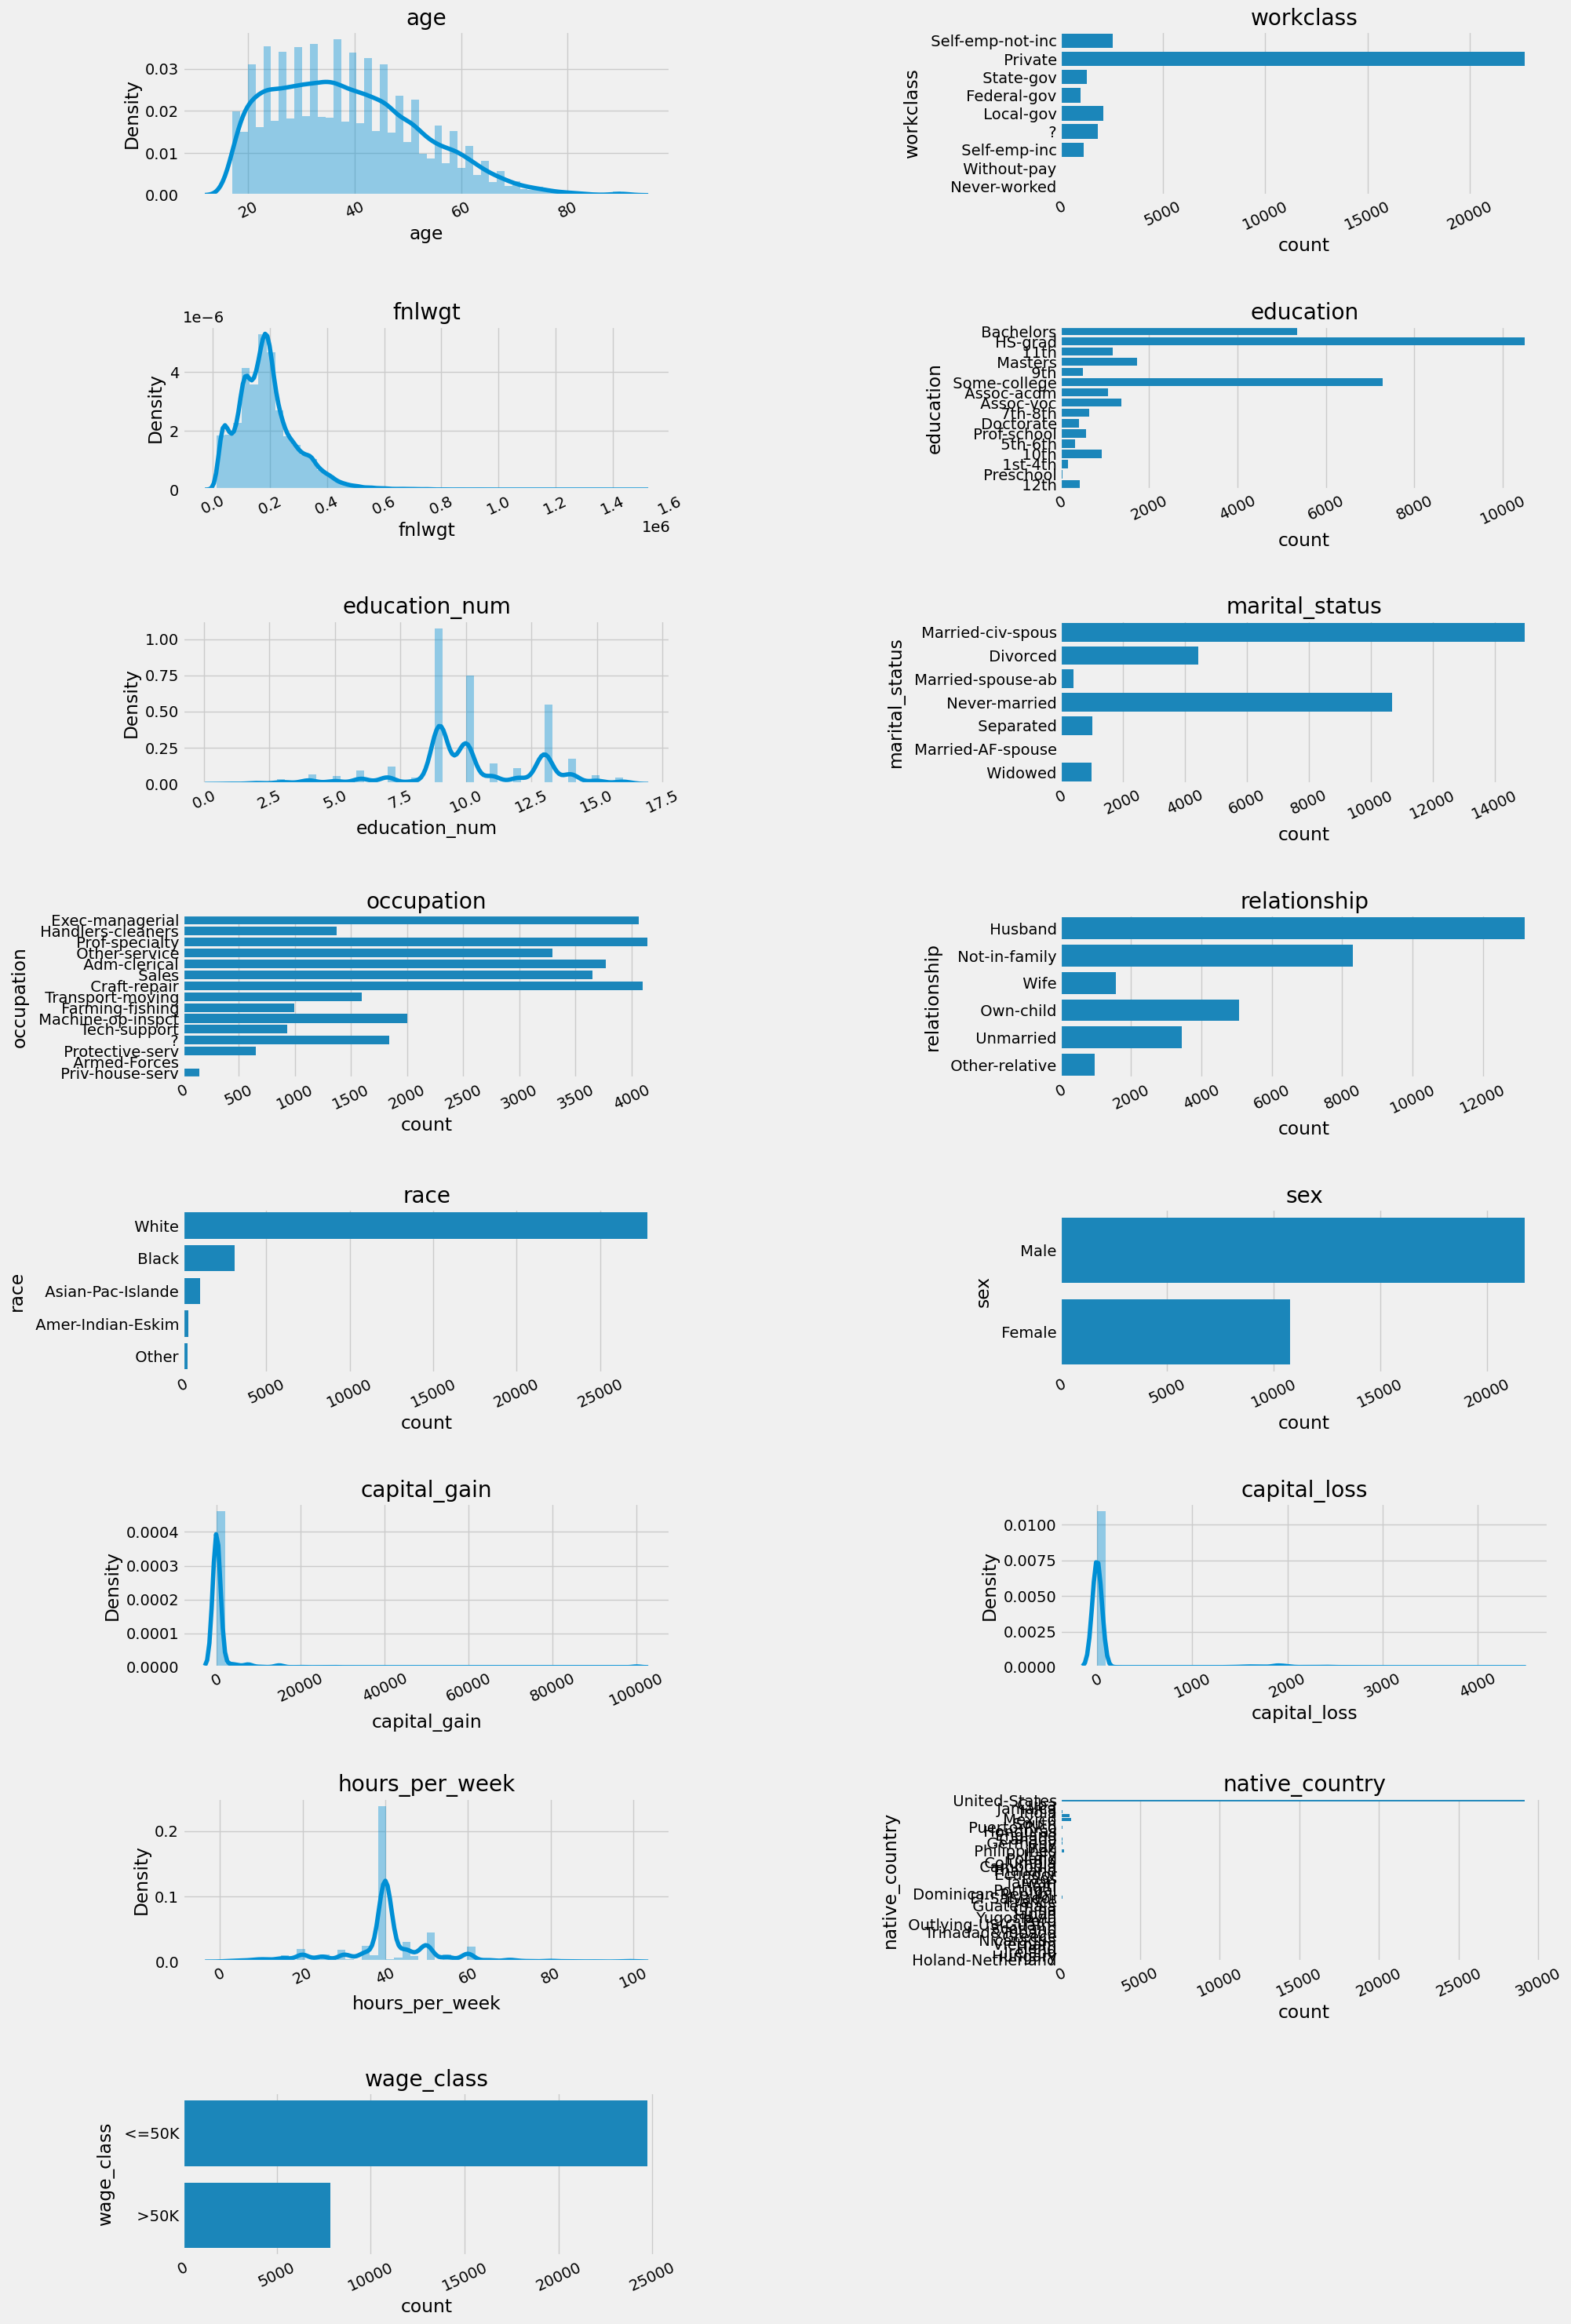

In [35]:
plot_distribution(Sample, cols=2, width=20, height=35, hspace=0.8, wspace=0.8)

## In the figure above, the plot for Native country column is not clear. So, we'll plot it separately again

/tmp/ipython-input-1996680432.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12) # Set the y-tick labels with list of strings labels.


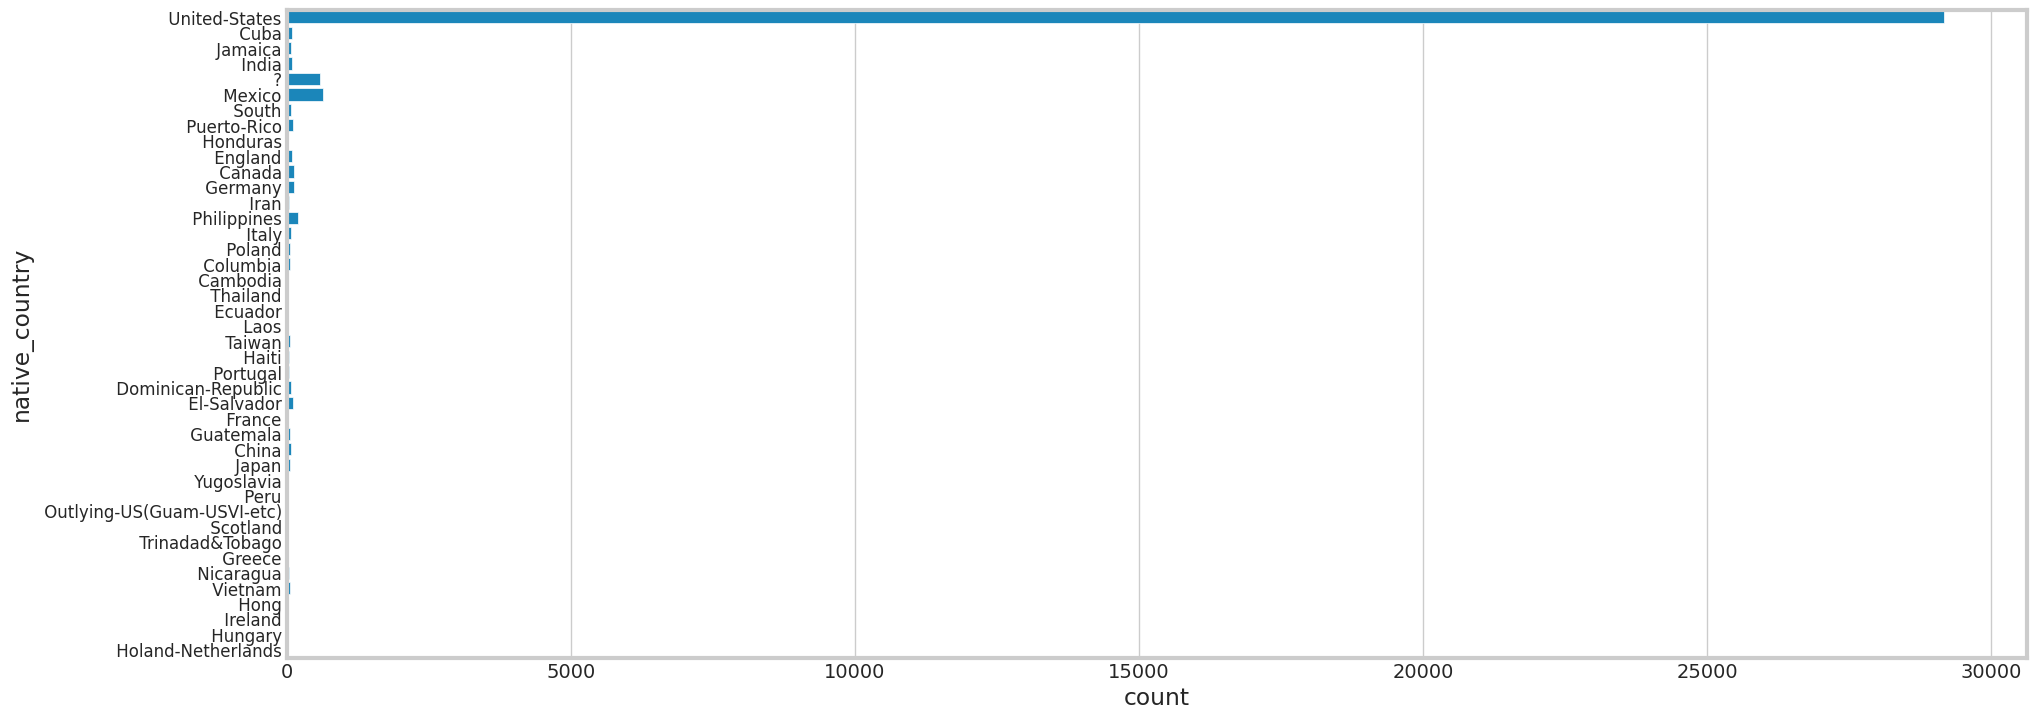

In [39]:
sns.set_style('whitegrid') #Use matplotlib style settings from a style specification.
%matplotlib inline
plt.figure(figsize=(20,8)) #Create a new figure
g = sns.countplot(y='native_country',data=Sample) # plotting the counts for native country

g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12) # Set the y-tick labels with list of strings labels.
plt.show()

## There is "?" symbols in the data set so we are Replacing it

In [40]:
train_set = train_set.apply(lambda x : x.replace(' ?',np.nan))
test_set = test_set.apply(lambda x : x.replace(' ?',np.nan))

In [41]:
train_set.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0


In [42]:
test_set.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,966
relationship,0
race,0
sex,0


## Dropping the NaN values

In [43]:
# Dropping the NaN values
test_set.dropna(inplace=True)
train_set.dropna(inplace=True)

In [44]:
test_set.isnull().sum(),train_set.isnull().sum()

(age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64,
 age               0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 wage_class        0
 dtype: int64)

## Converting Categorical data in to Numerical values

In [45]:
dict_sex = {}
count = 0
for i in X_train.sex.unique():
    dict_sex[i] = count
    count +=1

dict_sex

{' Male': 0, ' Female': 1}

In [48]:
dict_workclass ={}
count = 0
for i in X_train.workclass.unique():
    dict_workclass[i] = count
    count +=1

dict_workclass

{' Self-emp-not-inc': 0,
 ' Private': 1,
 ' State-gov': 2,
 ' Federal-gov': 3,
 ' Local-gov': 4,
 ' ?': 5,
 ' Self-emp-inc': 6,
 ' Without-pay': 7,
 ' Never-worked': 8}

In [50]:
dict_education = {}
count = 0
for i in X_train.education.unique():
  dict_education[i] = count
  count +=1

dict_education

{' Bachelors': 0,
 ' HS-grad': 1,
 ' 11th': 2,
 ' Masters': 3,
 ' 9th': 4,
 ' Some-college': 5,
 ' Assoc-acdm': 6,
 ' Assoc-voc': 7,
 ' 7th-8th': 8,
 ' Doctorate': 9,
 ' Prof-school': 10,
 ' 5th-6th': 11,
 ' 10th': 12,
 ' 1st-4th': 13,
 ' Preschool': 14,
 ' 12th': 15}

In [51]:
dict_marital_status = {}
count = 0
for i in X_train.marital_status.unique():
    dict_marital_status[i] = count
    count +=1

dict_marital_status

{' Married-civ-spouse': 0,
 ' Divorced': 1,
 ' Married-spouse-absent': 2,
 ' Never-married': 3,
 ' Separated': 4,
 ' Married-AF-spouse': 5,
 ' Widowed': 6}

In [52]:
dict_occupation = {}
count = 0
for i in X_train.occupation.unique():
    dict_occupation[i] = count
    count +=1

dict_occupation

{' Exec-managerial': 0,
 ' Handlers-cleaners': 1,
 ' Prof-specialty': 2,
 ' Other-service': 3,
 ' Adm-clerical': 4,
 ' Sales': 5,
 ' Craft-repair': 6,
 ' Transport-moving': 7,
 ' Farming-fishing': 8,
 ' Machine-op-inspct': 9,
 ' Tech-support': 10,
 ' ?': 11,
 ' Protective-serv': 12,
 ' Armed-Forces': 13,
 ' Priv-house-serv': 14}

In [53]:
dict_relationship = {}
count = 0
for i in X_train.relationship.unique():
    dict_relationship[i] = count
    count +=1

dict_relationship

{' Husband': 0,
 ' Not-in-family': 1,
 ' Wife': 2,
 ' Own-child': 3,
 ' Unmarried': 4,
 ' Other-relative': 5}

In [54]:
dict_race = {}
count = 0
for i in X_train.race.unique():
    dict_race[i] = count
    count +=1

dict_race

{' White': 0,
 ' Black': 1,
 ' Asian-Pac-Islander': 2,
 ' Amer-Indian-Eskimo': 3,
 ' Other': 4}

In [55]:
dict_native_country ={}
count = 0
for i in X_train.native_country.unique():
    dict_native_country[i] = count
    count +=1

dict_native_country

{' United-States': 0,
 ' Cuba': 1,
 ' Jamaica': 2,
 ' India': 3,
 ' ?': 4,
 ' Mexico': 5,
 ' South': 6,
 ' Puerto-Rico': 7,
 ' Honduras': 8,
 ' England': 9,
 ' Canada': 10,
 ' Germany': 11,
 ' Iran': 12,
 ' Philippines': 13,
 ' Italy': 14,
 ' Poland': 15,
 ' Columbia': 16,
 ' Cambodia': 17,
 ' Thailand': 18,
 ' Ecuador': 19,
 ' Laos': 20,
 ' Taiwan': 21,
 ' Haiti': 22,
 ' Portugal': 23,
 ' Dominican-Republic': 24,
 ' El-Salvador': 25,
 ' France': 26,
 ' Guatemala': 27,
 ' China': 28,
 ' Japan': 29,
 ' Yugoslavia': 30,
 ' Peru': 31,
 ' Outlying-US(Guam-USVI-etc)': 32,
 ' Scotland': 33,
 ' Trinadad&Tobago': 34,
 ' Greece': 35,
 ' Nicaragua': 36,
 ' Vietnam': 37,
 ' Hong': 38,
 ' Ireland': 39,
 ' Hungary': 40,
 ' Holand-Netherlands': 41}

In [56]:
dict_wage_class = {}
count = 0
for i in X_train.wage_class.unique():
    dict_wage_class[i] = count
    count +=1

dict_wage_class

{' <=50K': 0, ' >50K': 1}

In [57]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [58]:
X_train['sex'] = X_train['sex'].map(dict_sex)
X_train['education'] = X_train['education'].map(dict_education)
X_train['wage_class'] = X_train['wage_class'].map(dict_wage_class)
X_train['native_country'] = X_train['native_country'].map(dict_native_country)
X_train['race'] = X_train['race'].map(dict_race)
X_train['occupation']=X_train['occupation'].map(dict_occupation)
X_train['marital_status'] = X_train['marital_status'].map(dict_marital_status)
X_train['workclass'] = X_train['workclass'].map(dict_workclass)
X_train['relationship'] = X_train['relationship'].map(dict_relationship)

In [59]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0


In [60]:
X_train.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [61]:
X_train.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.614619,1.897818e+05,3.424570,10.080590,1.458784,4.734275,1.392291,0.221714,0.330805,1077.615172,87.306511,40.437469,1.290356,0.240817
std,13.640642,1.490557,1.055498e+05,3.453582,2.572709,1.622263,3.329518,1.535159,0.627357,0.470510,7385.402999,402.966116,12.347618,5.045446,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178315e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.000000,1.783630e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.370545e+05,5.000000,12.000000,3.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [64]:
# Checking the counts of the individual values in the 'wage_class' column
print(X_train.wage_class.value_counts())
print(X_test.wage_class.value_counts())

wage_class
0    24719
1     7841
Name: count, dtype: int64
wage_class
<=50K.    12434
>50K.      3846
Name: count, dtype: int64


## Note
Negative class is around 76% of the whole data samples. Positive class is around 24 % of the whole data samples. The dataset seems to be almost a balanced dataset

In [65]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [66]:
X_test['sex'] = X_test['sex'].map(dict_sex)
X_test['education'] = X_test['education'].map(dict_education)
X_test['wage_class'] = X_test['wage_class'].map(dict_wage_class)
X_test['native_country'] = X_test['native_country'].map(dict_native_country)
X_test['race'] = X_test['race'].map(dict_race)
X_test['occupation']=X_test['occupation'].map(dict_occupation)
X_test['marital_status'] = X_test['marital_status'].map(dict_marital_status)
X_test['workclass'] = X_test['workclass'].map(dict_workclass)
X_test['relationship'] = X_test['relationship'].map(dict_relationship)

In [67]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,1,89814,1,9,0,8,0,0,0,0,0,50,0,NaN
1,28,4,336951,6,12,0,12,0,0,0,0,0,40,0,NaN
2,44,1,160323,5,10,0,9,0,1,0,7688,0,40,0,NaN
3,18,5,103497,5,10,3,11,3,0,1,0,0,30,0,NaN
4,34,1,198693,12,6,3,3,1,0,0,0,0,30,0,NaN


In [68]:
dict_wage_class

{' <=50K': 0, ' >50K': 1}

In [69]:
X_test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,16280.000000,16280.00000,1.628000e+04,16280.000000,16280.000000,16280.000000,16280.000000,16280.000000,16280.00000,16280.000000,16280.00000,16280.000000,16280.000000,16280.000000,0.0
mean,38.768305,1.62930,1.894334e+05,3.387039,10.073096,1.483354,4.791216,1.393182,0.21726,0.332985,1081.97156,87.904668,40.392260,1.241216,NaN
std,13.849192,1.50992,1.057177e+05,3.440813,2.567511,1.633460,3.375522,1.534425,0.62222,0.471296,7584.16416,403.117078,12.479715,4.942061,NaN
min,17.000000,0.00000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,NaN
25%,28.000000,1.00000,1.167162e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.00000,0.000000,40.000000,0.000000,NaN
50%,37.000000,1.00000,1.778295e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.00000,0.000000,0.00000,0.000000,40.000000,0.000000,NaN
75%,48.000000,1.00000,2.383840e+05,5.000000,12.000000,3.000000,7.000000,3.000000,0.00000,1.000000,0.00000,0.000000,45.000000,0.000000,NaN
max,90.000000,8.00000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.00000,1.000000,99999.00000,3770.000000,99.000000,40.000000,NaN


## Now Annual Income Data Analysis using Visualization

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sex', ylabel='count'>

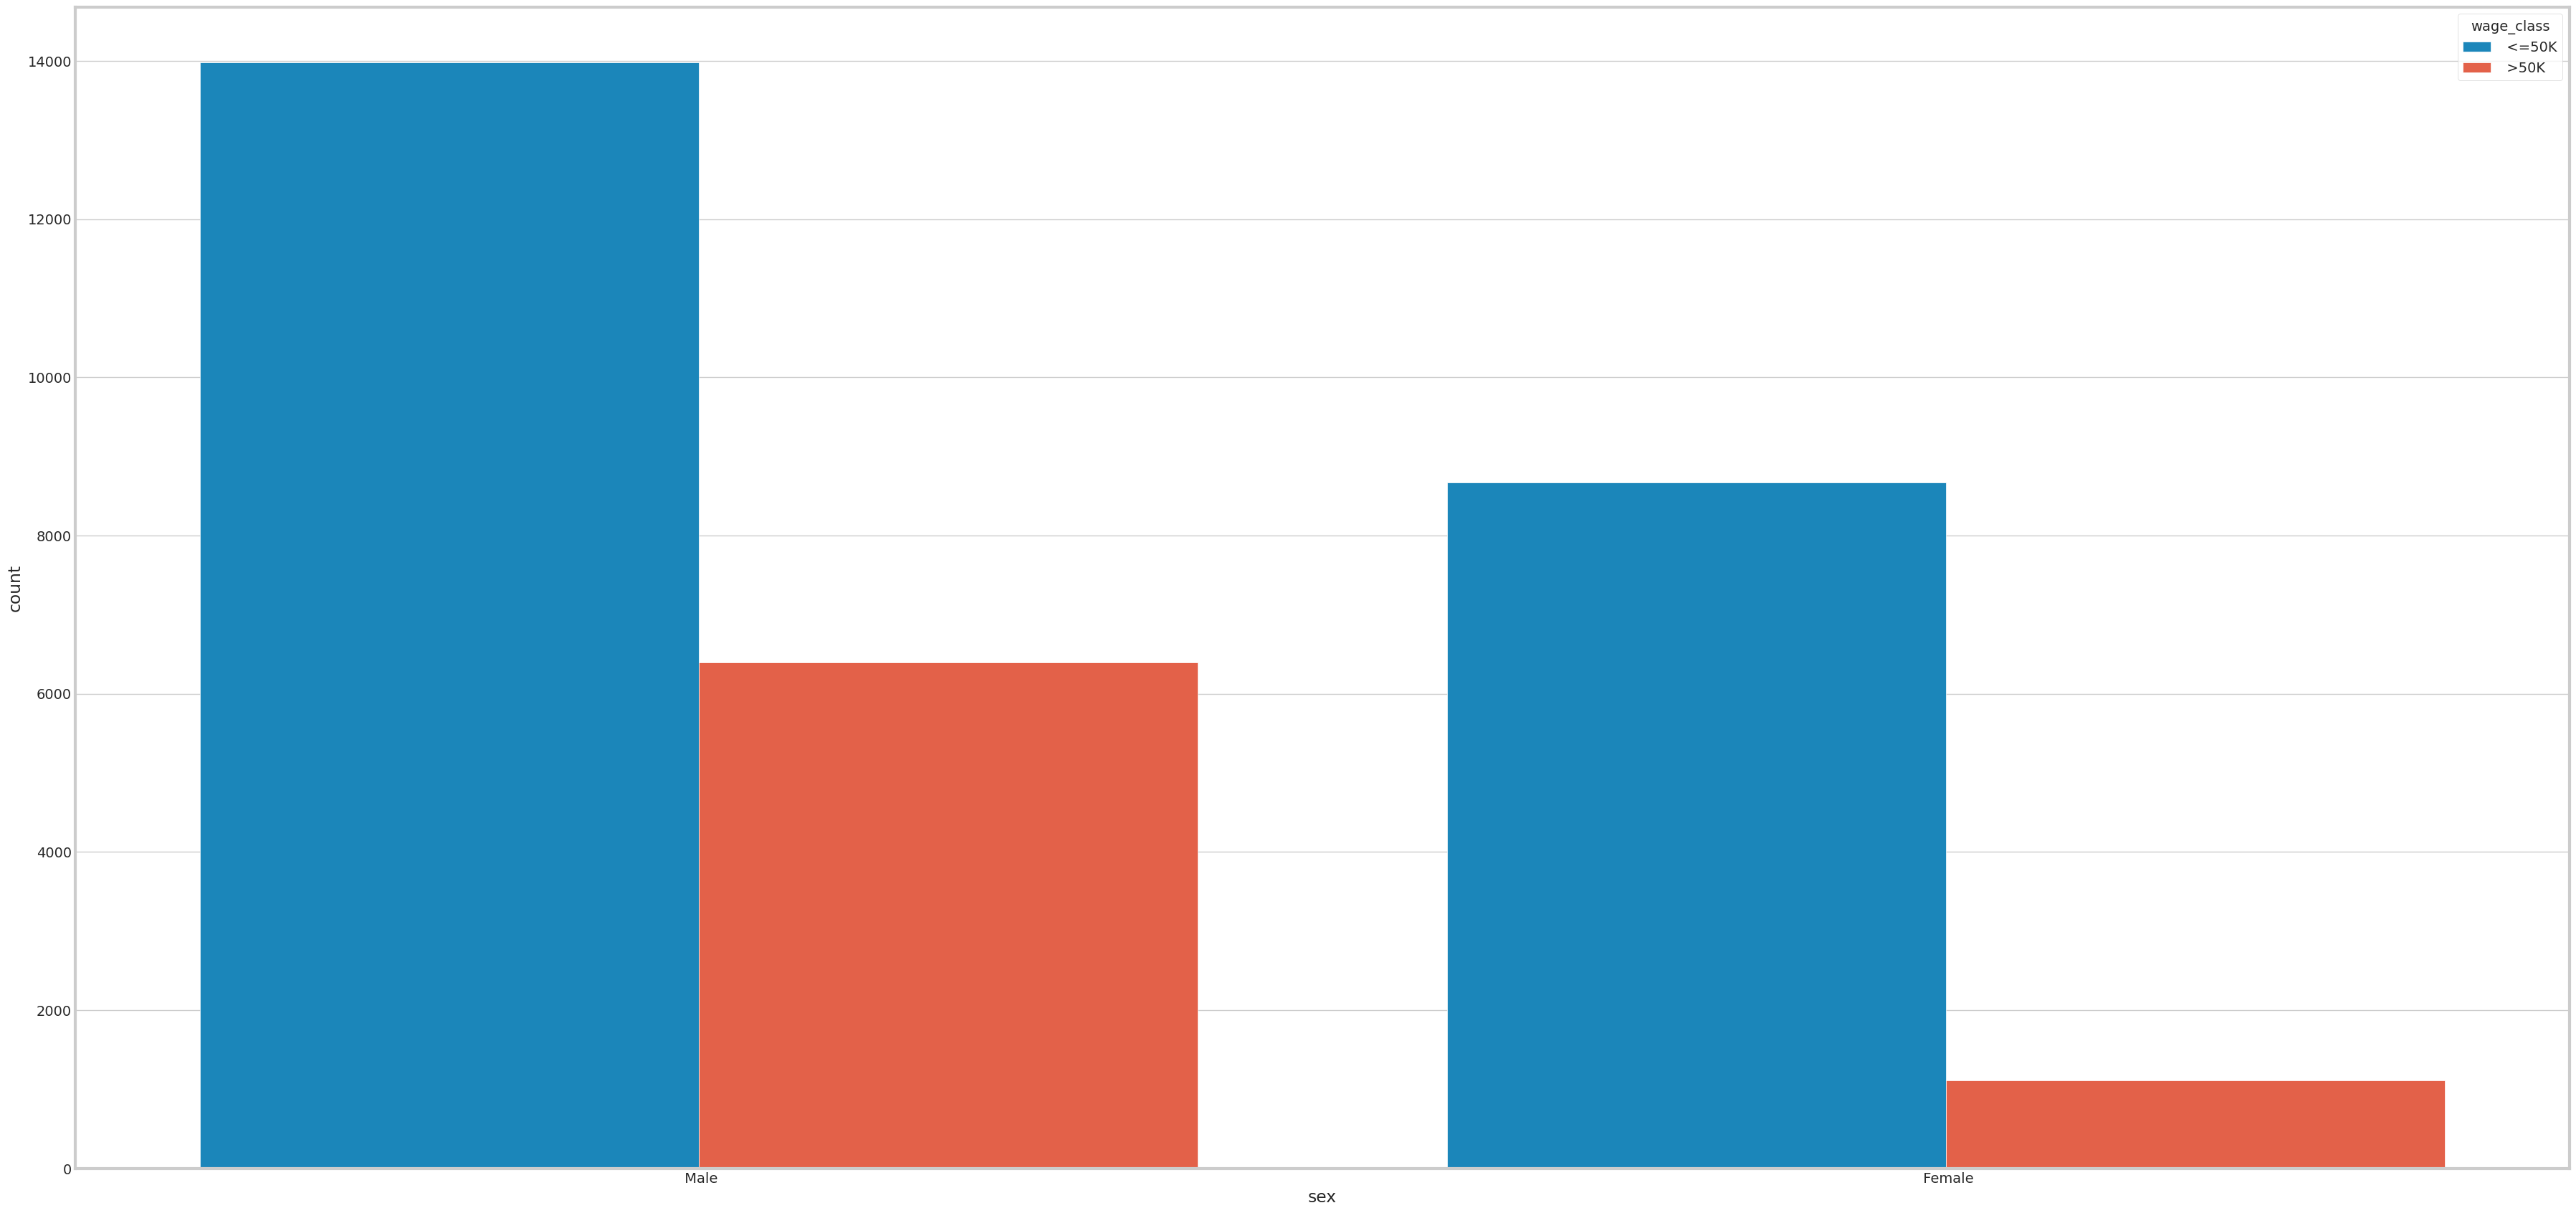

In [72]:
plt.figure(figsize=(40,20))
sns.set_style('whitegrid')
%matplotlib inline
sns.countplot(data=train_set,x='sex',hue='wage_class')

/tmp/ipython-input-2513975391.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)


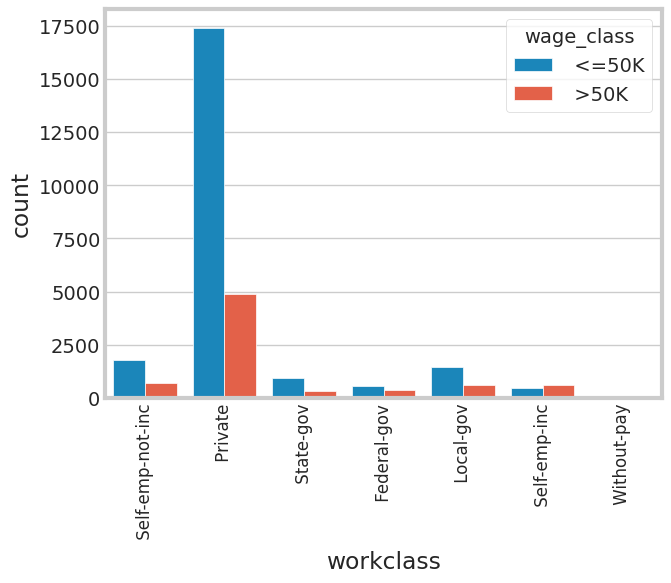

In [73]:
g = sns.countplot(data=train_set,x='workclass',hue='wage_class')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

/tmp/ipython-input-1348755231.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)


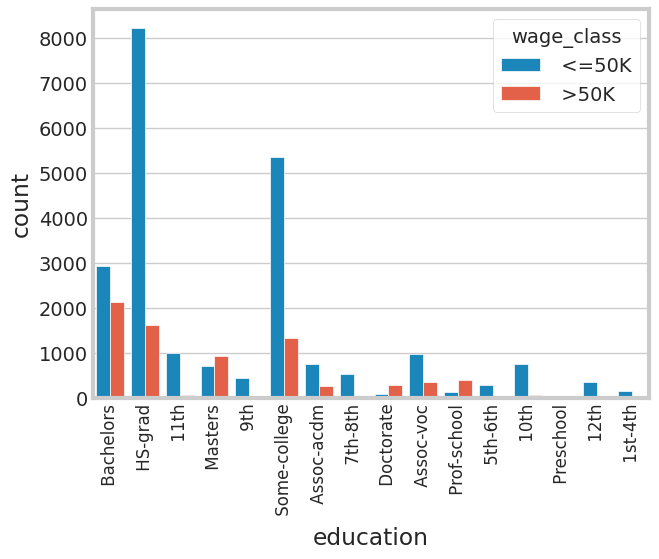

In [74]:
g = sns.countplot(data=train_set,x='education',hue='wage_class')
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
plt.show()

/tmp/ipython-input-2218354292.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12)


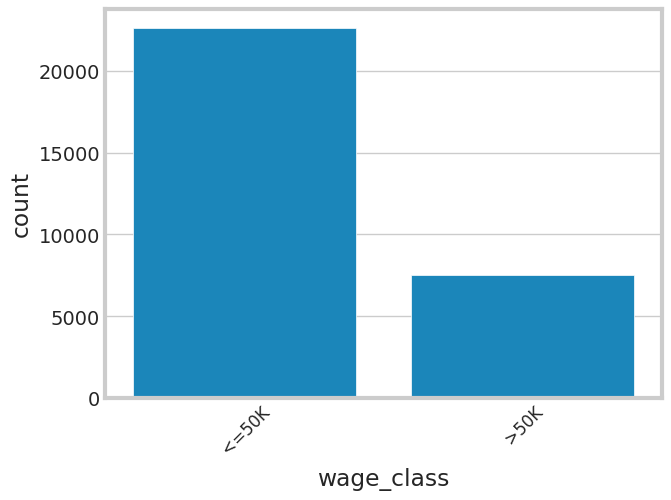

In [75]:
g = sns.countplot(data=train_set,x='wage_class')
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 12)
plt.show()

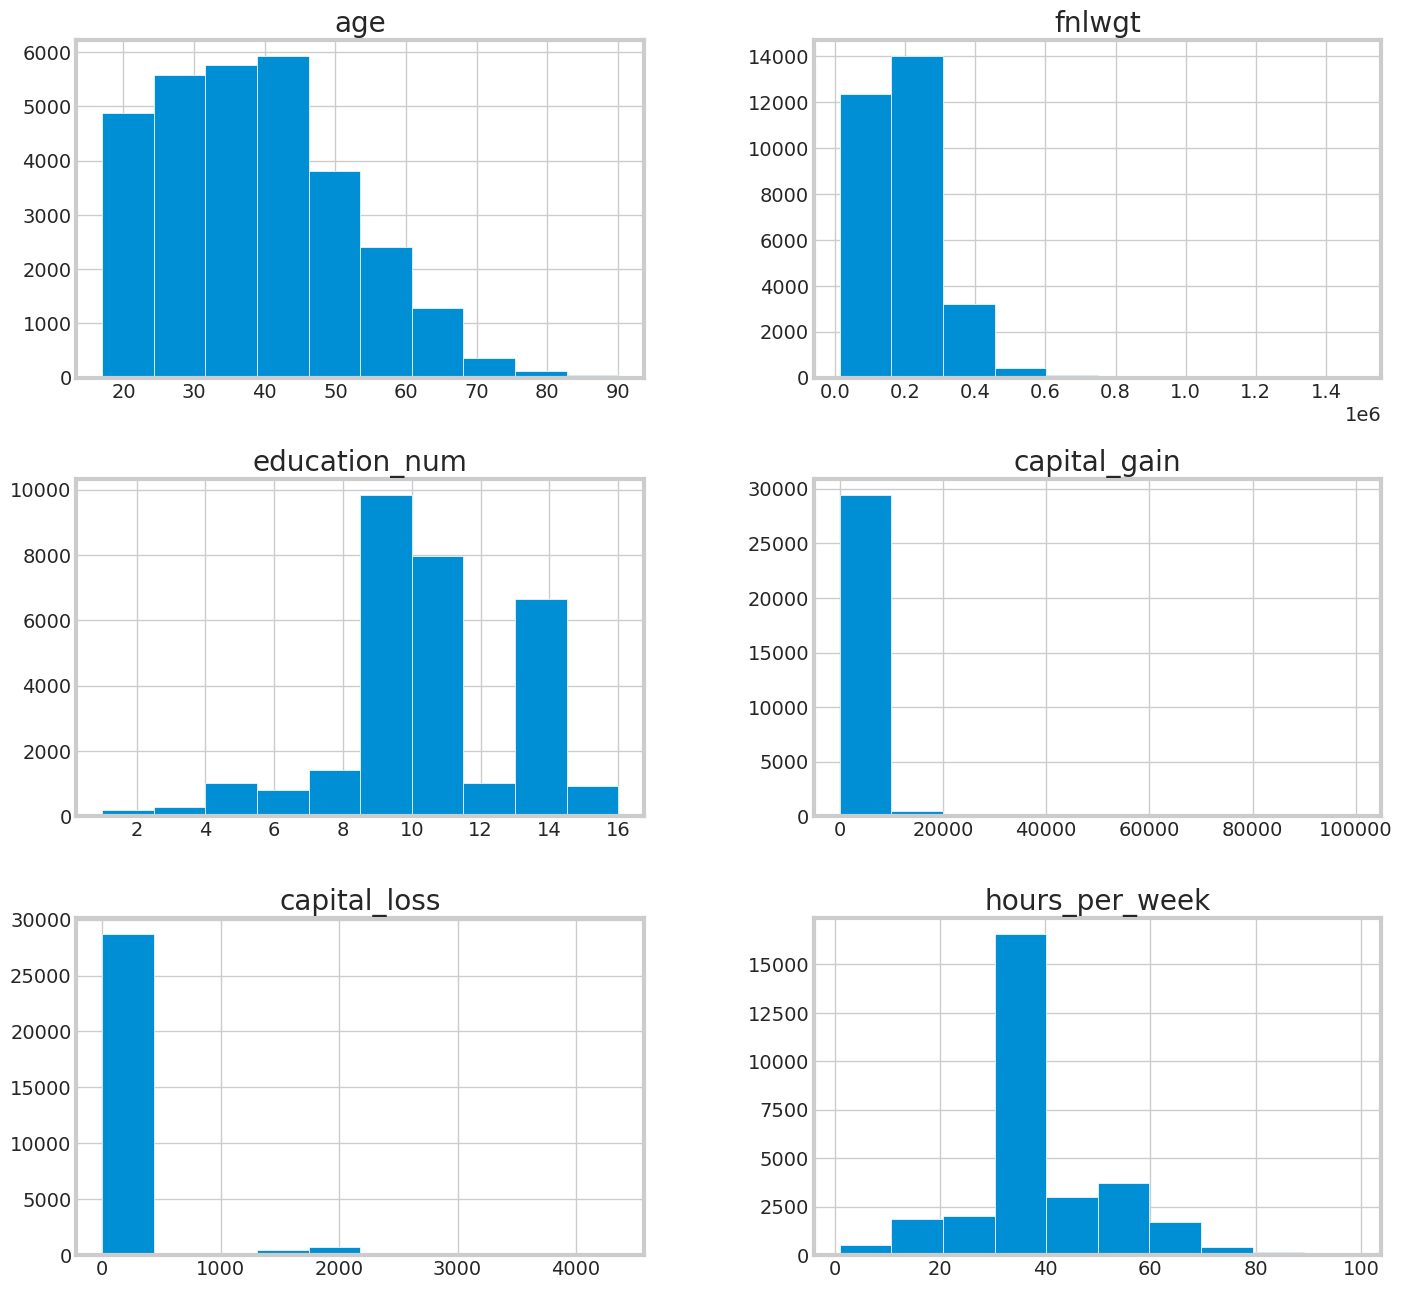

In [76]:
pd.DataFrame.hist(train_set,figsize = [15,15])
plt.show()

## Now, we have our train and test data ready to be used in training a machine
learning model.

In [77]:
X_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,38,1,89814,1,9,0,8,0,0,0,0,0,50,0,NaN
1,28,4,336951,6,12,0,12,0,0,0,0,0,40,0,NaN
2,44,1,160323,5,10,0,9,0,1,0,7688,0,40,0,NaN
3,18,5,103497,5,10,3,11,3,0,1,0,0,30,0,NaN
4,34,1,198693,12,6,3,3,1,0,0,0,0,30,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,1,215419,0,13,1,2,1,0,1,0,0,36,0,NaN
16276,64,5,321403,1,9,6,11,5,1,0,0,0,40,0,NaN
16277,38,1,374983,0,13,0,2,0,0,0,0,0,50,0,NaN
16278,44,1,83891,0,13,1,4,3,2,0,5455,0,40,0,NaN


In [78]:
X_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,50,0,83311,0,13,0,0,0,0,0,0,0,13,0,0
1,38,1,215646,1,9,1,1,1,0,0,0,0,40,0,0
2,53,1,234721,2,7,0,1,0,1,0,0,0,40,0,0
3,28,1,338409,0,13,0,2,2,1,1,0,0,40,1,0
4,37,1,284582,3,14,0,0,2,0,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,257302,6,12,0,10,2,0,1,0,0,38,0,0
32556,40,1,154374,1,9,0,9,0,0,0,0,0,40,0,1
32557,58,1,151910,1,9,6,4,4,0,1,0,0,40,0,0
32558,22,1,201490,1,9,3,4,3,0,0,0,0,20,0,0


# Python program to implement sklearn logistic regression model on load_iris dataset of sklearn  

In [82]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [83]:
X, Y = load_iris(return_X_y = True)

In [84]:
data=pd.DataFrame(X,columns=['A','B','C','D'])
data['Target']=Y

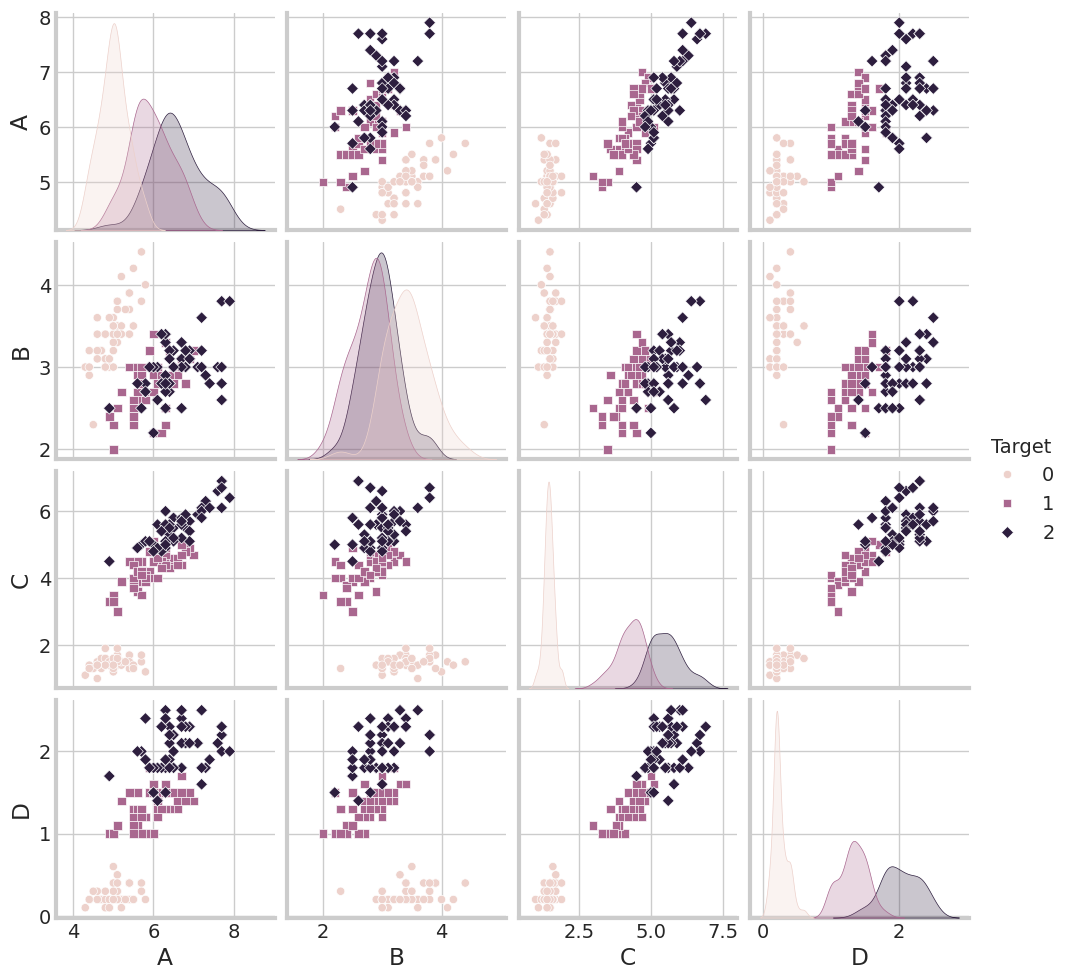

In [85]:
sns.pairplot(data,hue='Target',markers=["o", "s", "D"])